# Apply 3 different CNN's on the MNIST dataset

In [8]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#Refer this link for making better CNN networks
#https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architecturespart-ii-hyper-parameter-42efca01e5d7
import warnings
warnings.filterwarnings("ignore")
#from __future__ import print_function
exec('from __future__ import absolute_import, division, print_function')
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# Preparing trainining and testing data
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape)
if K.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   input_shape = (1, img_rows, img_cols)
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334 # this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


# Model 1-> 2 conv + 2 maxpoll+ 3 dense layers

In [12]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
__________

In [14]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 288us/step - loss: 0.0689 - acc: 0.9789 - val_loss: 0.0538 - val_acc: 0.9838
Epoch 2/12
60000/60000 [==============================] - 15s 243us/step - loss: 0.0510 - acc: 0.9845 - val_loss: 0.0496 - val_acc: 0.9834
Epoch 3/12
60000/60000 [==============================] - 15s 246us/step - loss: 0.0395 - acc: 0.9879 - val_loss: 0.0364 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0318 - acc: 0.9898 - val_loss: 0.0342 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 15s 258us/step - loss: 0.0290 - acc: 0.9908 - val_loss: 0.0356 - val_acc: 0.9884
Epoch 6/12
60000/60000 [==============================] - 15s 249us/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 7/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.0215 - acc: 0.9932 - val_loss: 0.

Train score: 0.010427321565627062
Train accuracy: 99.67333333333333

************************ *********************

Test score: 0.039050305695623684
Test accuracy: 98.81


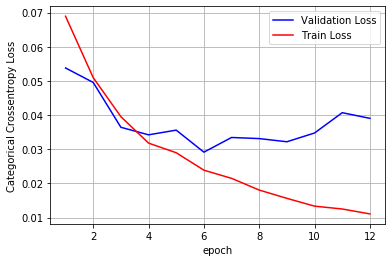

In [15]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 2-> 3 conv + 3 maxpoll+ 2 dense layers

In [16]:
import warnings
warnings.filterwarnings("ignore")
# go basic model to deep layer model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> conv -> polling -> FC -> output
# 8 32 128 64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
__________

In [17]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 40s 670us/step - loss: 0.3216 - acc: 0.9046 - val_loss: 0.1012 - val_acc: 0.9684
Epoch 2/12
60000/60000 [==============================] - 38s 627us/step - loss: 0.0935 - acc: 0.9714 - val_loss: 0.0711 - val_acc: 0.9772
Epoch 3/12
60000/60000 [==============================] - 37s 620us/step - loss: 0.0665 - acc: 0.9797 - val_loss: 0.0708 - val_acc: 0.9789
Epoch 4/12
60000/60000 [==============================] - 37s 620us/step - loss: 0.0537 - acc: 0.9834 - val_loss: 0.0510 - val_acc: 0.9845
Epoch 5/12
60000/60000 [==============================] - 38s 627us/step - loss: 0.0458 - acc: 0.9854 - val_loss: 0.0579 - val_acc: 0.9832
Epoch 6/12
60000/60000 [==============================] - 37s 620us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0448 - val_acc: 0.9861
Epoch 7/12
60000/60000 [==============================] - 37s 624us/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.

Train score: 0.009743525346997921
Train accuracy: 99.69833333333334

************************ *********************

Test score: 0.04539995787585067
Test accuracy: 98.81


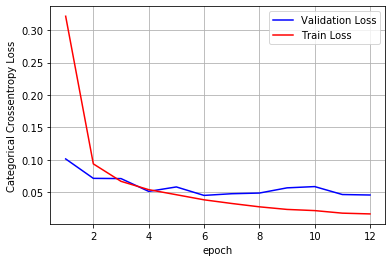

In [18]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Finally we train a model with the trend Conv-Conv-Pool-Conv-Conv-Pool

# Model 3 -> 4 conv+ 2 maxpoll + 2 dence

In [19]:
# go basic model to deep layer model
# Network Architecture
# input -> conv -> conv -> polling -> conv -> conv -> polling -> FC -> output
# 16 16 32 32 512
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
__________

In [20]:
import warnings
warnings.filterwarnings("ignore")
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1727 - acc: 0.9479 - val_loss: 0.0515 - val_acc: 0.9826
Epoch 2/12
60000/60000 [==============================] - 59s 987us/step - loss: 0.0442 - acc: 0.9862 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 3/12
60000/60000 [==============================] - 59s 983us/step - loss: 0.0306 - acc: 0.9906 - val_loss: 0.0258 - val_acc: 0.9912
Epoch 4/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0296 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0173 - acc: 0.9940 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 6/12
60000/60000 [==============================] - 57s 957us/step - loss: 0.0147 - acc: 0.9952 - val_loss: 0.0319 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0282 - v

Train score: 0.0032476350627371935
Train accuracy: 99.90833333333333

************************ *********************

Test score: 0.024233603691490725
Test accuracy: 99.35000000000001


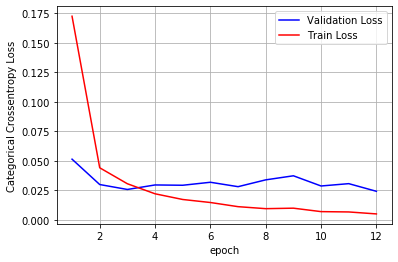

In [21]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# Model 1-> 2 conv + 2 maxpoll+ 3 dense layer +Dropout (0.5)

In [23]:
#Same models with Dropouts
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling ->droupout-> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               48120     
__________

In [24]:
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 284us/step - loss: 0.4244 - acc: 0.8639 - val_loss: 0.0859 - val_acc: 0.9748
Epoch 2/12
60000/60000 [==============================] - 16s 268us/step - loss: 0.1336 - acc: 0.9576 - val_loss: 0.0558 - val_acc: 0.9824
Epoch 3/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.1068 - acc: 0.9662 - val_loss: 0.0446 - val_acc: 0.9849
Epoch 4/12
60000/60000 [==============================] - 17s 276us/step - loss: 0.0897 - acc: 0.9710 - val_loss: 0.0395 - val_acc: 0.9867
Epoch 5/12
60000/60000 [==============================] - 17s 286us/step - loss: 0.0777 - acc: 0.9746 - val_loss: 0.0351 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.0733 - acc: 0.9768 - val_loss: 0.0346 - val_acc: 0.9881
Epoch 7/12
60000/60000 [==============================] - 17s 277us/step - loss: 0.0653 - acc: 0.9791 - val_loss: 0.

Train score: 0.018932762710633686
Train accuracy: 99.43666666666667

************************ *********************

Test score: 0.027327572450373556
Test accuracy: 99.1


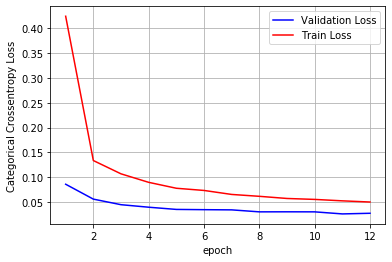

In [25]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# Model 2-> 3 conv + 3 maxpoll+ 2 dense layers + Dropout (0.9)

In [27]:
import warnings
warnings.filterwarnings("ignore")
# go basic model to deep layer model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> conv -> polling ->dropout-> FC -> output
# 8 32 128 64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

W0629 22:43:29.693563   692 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1, 128)         0         
__________

In [28]:
history=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 39s 654us/step - loss: 1.3013 - acc: 0.5210 - val_loss: 0.2997 - val_acc: 0.9407
Epoch 2/12
60000/60000 [==============================] - 37s 615us/step - loss: 0.8030 - acc: 0.7029 - val_loss: 0.1820 - val_acc: 0.9527
Epoch 3/12
60000/60000 [==============================] - 37s 616us/step - loss: 0.6701 - acc: 0.7518 - val_loss: 0.1444 - val_acc: 0.9614
Epoch 4/12
60000/60000 [==============================] - 36s 605us/step - loss: 0.6075 - acc: 0.7772 - val_loss: 0.1168 - val_acc: 0.9679
Epoch 5/12
60000/60000 [==============================] - 37s 620us/step - loss: 0.5534 - acc: 0.8004 - val_loss: 0.1155 - val_acc: 0.9679
Epoch 6/12
60000/60000 [==============================] - 37s 610us/step - loss: 0.5137 - acc: 0.8165 - val_loss: 0.1043 - val_acc: 0.9701
Epoch 7/12
60000/60000 [==============================] - 37s 617us/step - loss: 0.4818 - acc: 0.8267 - val_loss: 0.

Train score: 0.08697761877303323
Train accuracy: 97.515

************************ *********************

Test score: 0.09679163726270198
Test accuracy: 97.00999999999999


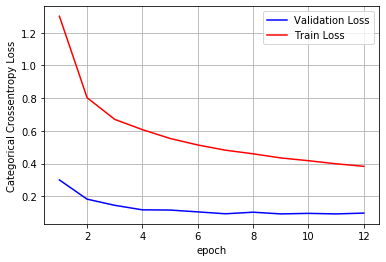

In [29]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 3-> 4 conv + 2 maxpoll+ 2 dense layers + Dropout (0.3)

In [30]:

# go basic model to deep layer model
# Network Architecture
# input -> conv -> conv -> polling -> conv -> conv -> polling ->dropout-> FC -> output
# 16 16 32 32 512
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.adam(),
metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 32)          0         
__________

In [31]:
history=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 59s 975us/step - loss: 0.2071 - acc: 0.9347 - val_loss: 0.0499 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 57s 957us/step - loss: 0.0600 - acc: 0.9814 - val_loss: 0.0342 - val_acc: 0.9890
Epoch 3/12
60000/60000 [==============================] - 58s 963us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0331 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 57s 957us/step - loss: 0.0330 - acc: 0.9895 - val_loss: 0.0222 - val_acc: 0.9932
Epoch 5/12
60000/60000 [==============================] - 58s 967us/step - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0241 - val_acc: 0.9920
Epoch 6/12
60000/60000 [==============================] - 59s 979us/step - loss: 0.0242 - acc: 0.9922 - val_loss: 0.0213 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 59s 976us/step - loss: 0.0198 - acc: 0.9939 - val_loss: 0.

Train score: 0.00590441487302293
Train accuracy: 99.80166666666666

************************ *********************

Test score: 0.023363230100554574
Test accuracy: 99.36


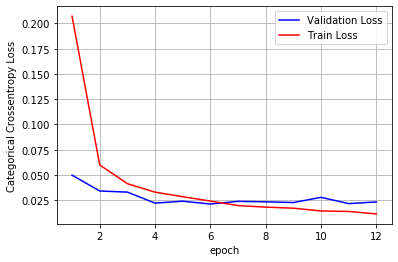

In [32]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Compare all the model results

In [33]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("conv_layers", "MAxPoll_layers", "Dense_layers","Dropout","Accuracy")
tb.add_row(["2", "2","3","NO",98.81])
tb.add_row(["3", "3","2","NO",98.81])
tb.add_row(["4", "2","2","NO",99.35])
tb.add_row(["2", "2","3","0.5",99.1])
tb.add_row(["3", "3","2","0.9",97.0])
tb.add_row(["4", "2","2","0.3",99.36])
print(tb.get_string(titles = "CNN Models - Observations"))

+-------------+----------------+--------------+---------+----------+
| conv_layers | MAxPoll_layers | Dense_layers | Dropout | Accuracy |
+-------------+----------------+--------------+---------+----------+
|      2      |       2        |      3       |    NO   |  98.81   |
|      3      |       3        |      2       |    NO   |  98.81   |
|      4      |       2        |      2       |    NO   |  99.35   |
|      2      |       2        |      3       |   0.5   |   99.1   |
|      3      |       3        |      2       |   0.9   |   97.0   |
|      4      |       2        |      2       |   0.3   |  99.36   |
+-------------+----------------+--------------+---------+----------+
